In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

In [81]:
file_id = "1leA3l307MYFVDbboxFzc2cnyy1wEU1DM"
download_url = f"https://drive.google.com/uc?id={file_id}"

df = pd.read_csv(download_url)

In [82]:
df.head()

,Title,Type,Episodes,Status,Starting season,Studios,Sources,Genres,Rating,Scored by,Members,Favorites,Score
0,Fullmetal Alchemist: Brotherhood,TV,64,Finished Airing,Spring,Bones,Manga,"Action,Military,Adventure,Comedy,Drama,Magic,F...",R,719706,1176368,105387,9.25
1,Kimi no Na wa.,Movie,1,Finished Airing,-,CoMix Wave Films,Original,"Supernatural,Drama,Romance,School",PG-13,454969,705186,33936,9.19
2,Gintama°,TV,51,Finished Airing,Spring,Bandai Namco Pictures,Manga,"Action,Comedy,Historical,Parody,Samurai,Sci-Fi...",R,70279,194359,5597,9.16
3,Steins;Gate 0,TV,23,Currently Airing,Spring,White Fox,Visual novel,"Sci-Fi,Thriller",PG-13,12609,186331,1117,9.16
4,Steins;Gate,TV,24,Finished Airing,Spring,White Fox,Visual novel,"Sci-Fi,Thriller",PG-13,552791,990419,90365,9.14


In [83]:
# drop Title
df = df.drop(columns=['Title'], axis=1)

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1563 entries, 0 to 1562
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             1563 non-null   object 
 1   Episodes         1563 non-null   object 
 2   Status           1563 non-null   object 
 3   Starting season  1563 non-null   object 
 4   Studios          1563 non-null   object 
 5   Sources          1563 non-null   object 
 6   Genres           1563 non-null   object 
 7   Rating           1554 non-null   object 
 8   Scored by        1563 non-null   int64  
 9   Members          1563 non-null   int64  
 10  Favorites        1563 non-null   int64  
 11  Score            1563 non-null   float64
dtypes: float64(1), int64(3), object(8)
memory usage: 146.7+ KB


In [85]:
# check unique value
for col in df.columns:
  unique_val = df[col].unique()
  num_unique = len(unique_val)
  dtype = df[col].dtype
  if(num_unique <= 15):
    print(f'{dtype} : {col} : {num_unique} -- {unique_val}\n')

  else:
    print(f'{dtype} : {col} : {num_unique}\n')

object : Type : 6 -- ['TV' 'Movie' 'OVA' 'Special' 'Music' 'ONA']

object : Episodes : 107

object : Status : 2 -- ['Finished Airing' 'Currently Airing']

object : Starting season : 5 -- ['Spring' '-' 'Fall' 'Summer' 'Winter']

object : Studios : 200

object : Sources : 14 -- ['Manga' 'Original' 'Visual novel' 'Novel' 'Light novel' 'Web manga'
 'Other' 'Music' '4-koma manga' '-' 'Game' 'Picture book' 'Book'
 'Card game']

object : Genres : 1004

object : Rating : 5 -- ['R' 'PG-13' 'PG' 'G' nan]

int64 : Scored by : 1548

int64 : Members : 1548

int64 : Favorites : 924

float64 : Score : 146



In [86]:
# check for special character value : '-'
col_with_dash = []
for col in df.columns:
  unique_val = df[col].unique()
  if '-' in unique_val:
    col_with_dash.append(col)
print(col_with_dash)

['Episodes', 'Starting season', 'Studios', 'Sources']


In [87]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Type,1563,6,TV,821,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Episodes,1563,107,1,525,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Status,1563,2,Finished Airing,1528,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Starting season,1563,5,-,742,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Studios,1563,200,Sunrise,106,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sources,1563,14,Manga,767,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Genres,1563,1004,"Slice of Life,Comedy",16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rating,1554,4,PG-13,1040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Scored by,1563.0,NaN,NaN,NaN,60537.209213,99856.869169,144.0,6876.0,24730.0,68933.5,993775.0
Members,1563.0,NaN,NaN,NaN,115356.738324,166968.509538,781.0,17380.5,52097.0,136752.0,1432871.0


In [88]:
# Replace only exact matches of '-' with np.nan
df = df.replace({'-': np.nan})

In [89]:
df.isna().sum()

,0
Type,0
Episodes,11
Status,0
Starting season,742
Studios,46
Sources,100
Genres,0
Rating,9
Scored by,0
Members,0


In [90]:
df.shape

(1563, 12)

In [91]:
# Handle missing values
# Separate numerical and categorical features
num_cols = df.select_dtypes(include=np.number).columns.tolist()
cat_cols = df.select_dtypes(exclude=np.number).columns.tolist()

print(num_cols)
print(cat_cols)

['Scored by', 'Members', 'Favorites', 'Score']
['Type', 'Episodes', 'Status', 'Starting season', 'Studios', 'Sources', 'Genres', 'Rating']


In [92]:
# Impute numericals with median, categoricals with mode
num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')

df[num_cols] = num_imputer.fit_transform(df[num_cols])
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

In [93]:
df.isna().sum()

,0
Type,0
Episodes,0
Status,0
Starting season,0
Studios,0
Sources,0
Genres,0
Rating,0
Scored by,0
Members,0


In [94]:
df.dtypes

,0
Type,object
Episodes,object
Status,object
Starting season,object
Studios,object
Sources,object
Genres,object
Rating,object
Scored by,float64
Members,float64


In [95]:
# Look at Generes feature
df['Genres'].head()

,Genres
0,"Action,Military,Adventure,Comedy,Drama,Magic,F..."
1,"Supernatural,Drama,Romance,School"
2,"Action,Comedy,Historical,Parody,Samurai,Sci-Fi..."
3,"Sci-Fi,Thriller"
4,"Sci-Fi,Thriller"


In [96]:
df.duplicated().sum()

0

In [97]:
# Split Genres into individual categories
df['Genres'] = df['Genres'].str.split(',')

# Create binary features for each genre

mlb = MultiLabelBinarizer()
genre_features = pd.DataFrame(mlb.fit_transform(df['Genres']),
                              columns=[f'Genre_{genre}' for genre in mlb.classes_],
                              index=df.index)

# Add a feature for the number of genres
genre_features['Num_Genres'] = df['Genres'].apply(len)

In [98]:

# Drop the original 'Genres' column and concatenate new features
df = df.drop(columns=['Genres'])
df = pd.concat([df, genre_features], axis=1)


In [99]:
df.head()

,Type,Episodes,Status,Starting season,Studios,Sources,Rating,Scored by,Members,Favorites,...,Genre_Shounen Ai,Genre_Slice of Life,Genre_Space,Genre_Sports,Genre_Super Power,Genre_Supernatural,Genre_Thriller,Genre_Vampire,Genre_ Adventure,Num_Genres
0,TV,64,Finished Airing,Spring,Bones,Manga,R,719706.0,1176368.0,105387.0,...,0,0,0,0,0,0,0,0,0,8
1,Movie,1,Finished Airing,Fall,CoMix Wave Films,Original,PG-13,454969.0,705186.0,33936.0,...,0,0,0,0,0,1,0,0,0,4
2,TV,51,Finished Airing,Spring,Bandai Namco Pictures,Manga,R,70279.0,194359.0,5597.0,...,0,0,0,0,0,0,0,0,0,7
3,TV,23,Currently Airing,Spring,White Fox,Visual novel,PG-13,12609.0,186331.0,1117.0,...,0,0,0,0,0,0,1,0,0,2
4,TV,24,Finished Airing,Spring,White Fox,Visual novel,PG-13,552791.0,990419.0,90365.0,...,0,0,0,0,0,0,1,0,0,2


In [100]:
df.dtypes

,0
Type,object
Episodes,object
Status,object
Starting season,object
Studios,object
Sources,object
Rating,object
Scored by,float64
Members,float64
Favorites,float64


### Feature Encoding

In [101]:
cat_cols = df.select_dtypes(exclude=np.number).columns.tolist()
cat_cols

['Type',
 'Episodes',
 'Status',
 'Starting season',
 'Studios',
 'Sources',
 'Rating']

In [102]:
# Encode categorical variables
encoder = OrdinalEncoder()
df[cat_cols] = encoder.fit_transform(df[cat_cols])

In [103]:
# Normalize column Scored by, Numbers and Favorites
scaler = MinMaxScaler()

X = df.drop('Score', axis=1)
X = scaler.fit_transform(X)

y = df['Score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)


In [104]:
# Define models
models = {
    'Linear Regression': LinearRegression(),
    'XGBoost': XGBRegressor(
            objective='reg:squarederror',
            max_depth=6,
            learning_rate=0.1,
            n_estimators=500)
}

# Train and evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f'{name} Evaluation:')
    print(f'MSE: {mse:.4f}, RMSE: {rmse:.4f}, R²: {r2:.4f}\n')

Linear Regression Evaluation:
MSE: 0.0813, RMSE: 0.2852, R²: 0.3351

XGBoost Evaluation:
MSE: 0.0588, RMSE: 0.2425, R²: 0.5194



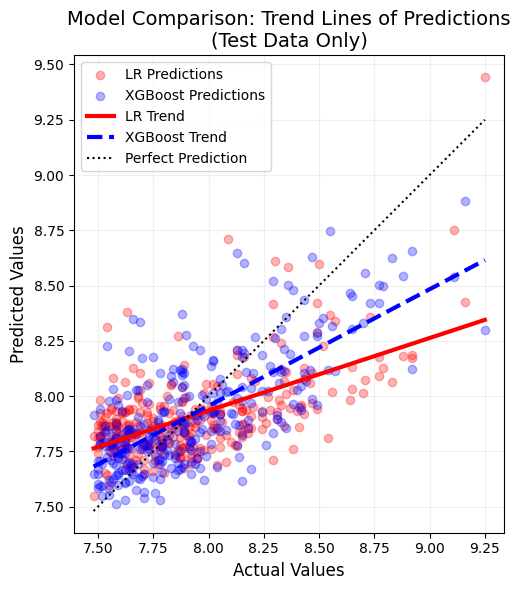

In [105]:
# Generate predictions using test data
y_test_pred_lr = models['Linear Regression'].predict(X_test)
y_test_pred_xgb = models['XGBoost'].predict(X_test)

# Create figure
plt.figure(figsize=(10, 6))

# Scatter plot (actual vs predicted)
plt.scatter(y_test, y_test_pred_lr, color='red', alpha=0.3, label='LR Predictions')
plt.scatter(y_test, y_test_pred_xgb, color='blue', alpha=0.3, label='XGBoost Predictions')

# Calculate best fit lines
lr_trend = np.poly1d(np.polyfit(y_test, y_test_pred_lr, 1))
xgb_trend = np.poly1d(np.polyfit(y_test, y_test_pred_xgb, 1))

# Generate x-values for lines
x_range = np.linspace(y_test.min(), y_test.max(), 100)

# Plot trend lines
plt.plot(x_range, lr_trend(x_range), 'r-', linewidth=3, label='LR Trend')
plt.plot(x_range, xgb_trend(x_range), 'b--', linewidth=3, label='XGBoost Trend')
plt.plot(x_range, x_range, 'k:', label='Perfect Prediction')

# Style elements
plt.xlabel('Actual Values', fontsize=12)
plt.ylabel('Predicted Values', fontsize=12)
plt.title('Model Comparison: Trend Lines of Predictions\n(Test Data Only)', fontsize=14)
plt.legend()
plt.grid(alpha=0.2)
plt.gca().set_aspect('equal', adjustable='box')

plt.tight_layout()
plt.show()

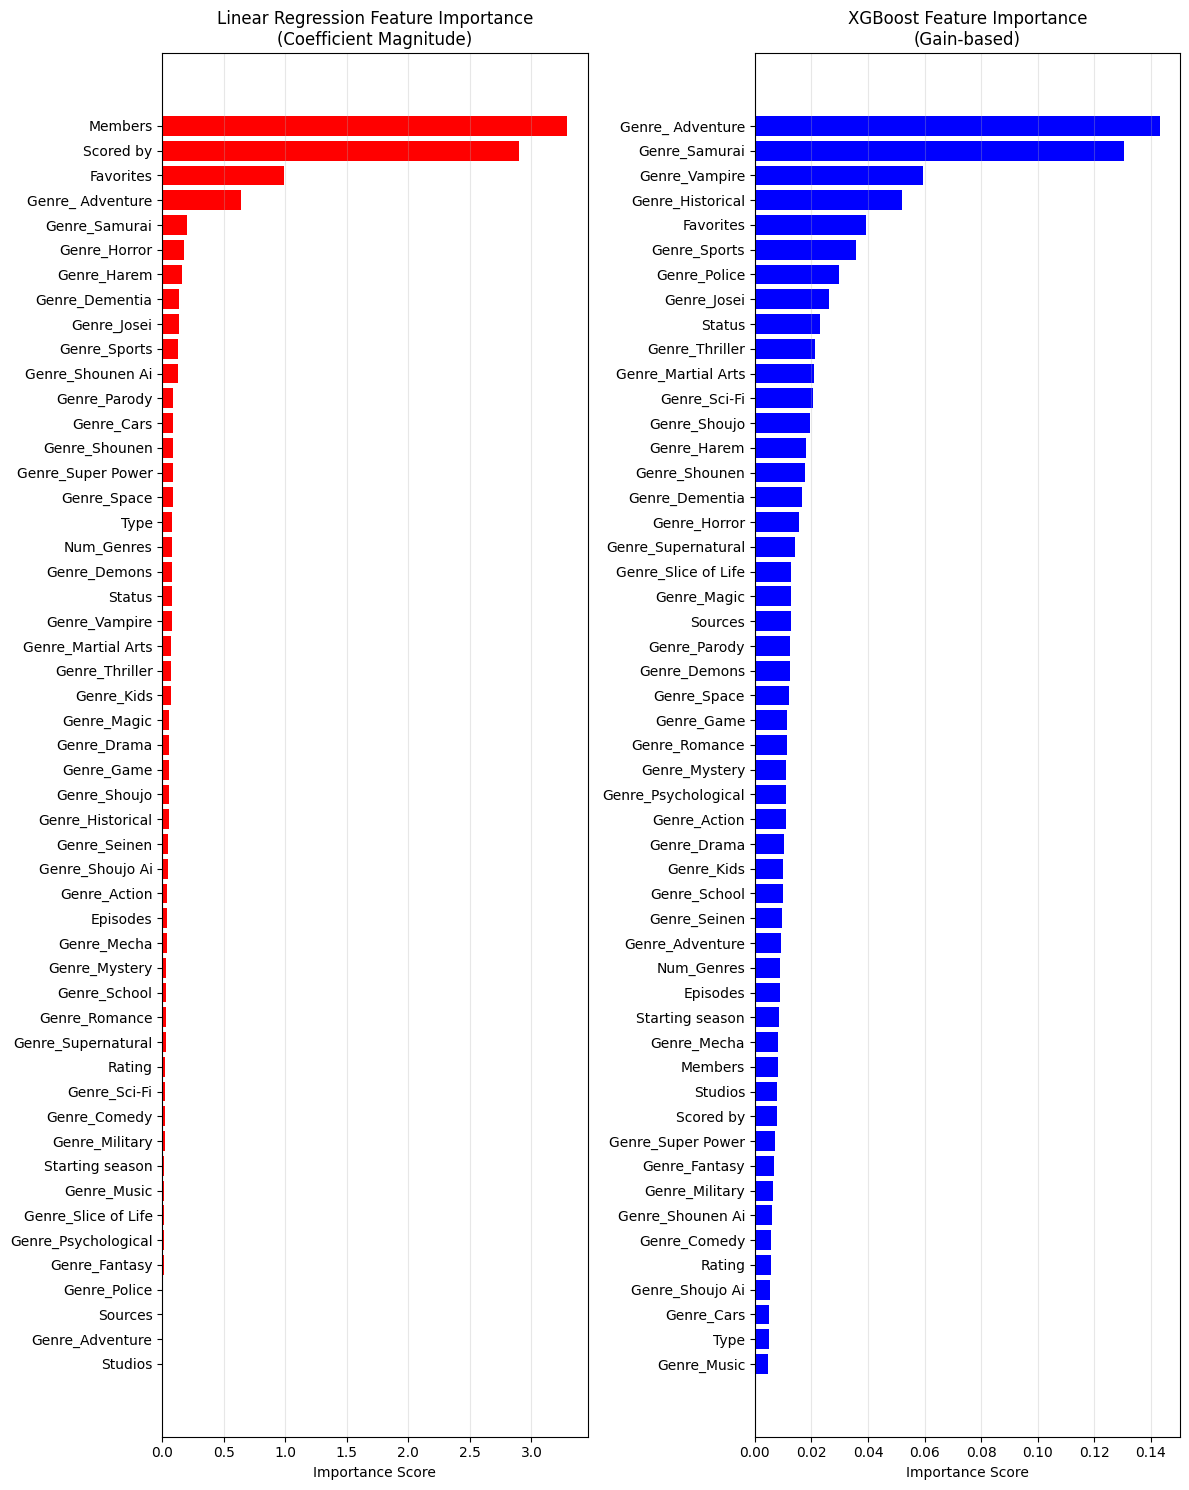

In [106]:
# Get feature names from the original DataFrame before scaling
features = df.drop('Score', axis=1).columns

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 15))

# Linear Regression Feature Importance (coefficient magnitude)
lr_model = models['Linear Regression']
lr_importance = np.abs(lr_model.coef_)
sorted_idx_lr = lr_importance.argsort()[::-1]

ax1.barh(features[sorted_idx_lr], lr_importance[sorted_idx_lr], color='red')
ax1.set_title('Linear Regression Feature Importance\n(Coefficient Magnitude)')
ax1.invert_yaxis()

# XGBoost Feature Importance (gain-based)
xgb_model = models['XGBoost']
xgb_importance = xgb_model.feature_importances_
sorted_idx_xgb = xgb_importance.argsort()[::-1]

ax2.barh(features[sorted_idx_xgb], xgb_importance[sorted_idx_xgb], color='blue')
ax2.set_title('XGBoost Feature Importance\n(Gain-based)')
ax2.invert_yaxis()

for ax in [ax1, ax2]:
    ax.set_xlabel('Importance Score')
    ax.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()